In [1]:
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
track1, neur1, behav1 = getdicts(foldnames, '355', 'epm')
track2, neur2, behav2 = getdicts(foldnames, '355', 'rat1')

In [3]:
mpos1 = track1['mouse_positionMS']
mpos2 = track2['mouse_positionMS']

In [4]:
calc1, calc2 = getcalcs(foldnames, '355', 'epm', 'rat1')

In [6]:
calc1 = zscore(calc1)
calc2 = zscore(calc2)

In [5]:
calc1.shape

(9040, 30)

In [8]:
armscores = np.zeros(30)
ctypes = []
for k in range(30):
    armscores[k] = armscore(calc1[:, k], behav1['o1Ind'], behav1['o2Ind'], behav1['c1Ind'], behav1['c2Ind'])
    ctype = celltype(calc1[:, k], behav1['o1Ind'].flatten(), behav1['o2Ind'].flatten(), behav1['c1Ind'].flatten(), behav1['c2Ind'].flatten())
    ctypes.append(ctype)
ctypes = np.array(ctypes)

In [9]:
rs = np.zeros(30)
for k in range(30):
    rs[k] = pearsonr(calc2[:, k], track2['distanceMouseRatMS'][:, 0])[0]

In [11]:
def plotheatmap(xy, data, **kwargs):
    figsize=(15, 15)
    cmap = 'jet'
    threshold = 0.00
    avg = True
    HH = None
    WW = None
    for key, item in kwargs.items():
        if key == 'ax':
            ax = item
        if key == 'avg':
            avg = item
        if key == 'HH':
            HH = item
        if key == 'WW':
            WW = item
    if not 'ax' in kwargs:
        plt.figure(figsize=figsize)
        ax = plt.gca()
        
    
    data = data.flatten()
    data = data - np.min(data)
    step = 20
    interpstep = 1
    xbin = np.arange(step*int(np.min(xy[:, 0]) / step) - step, step*np.ceil(np.max(xy[:, 0]) / step) + step, step)
    ybin = np.arange(step*int(np.min(xy[:, 1]) / step) - step, step*np.ceil(np.max(xy[:, 1]) / step) + step, step)
    avgs = -0.1*np.max(data)*np.ones((xbin.size, ybin.size))
    for i, x in enumerate(xbin):
        for j, y in enumerate(ybin):
            bindata = data[(x <= xy[:, 0])*(xy[:, 0] < x + step)*(y <= xy[:, 1])*(xy[:, 1] < y + step)]
            if bindata.size > 0:
                if avg == True:
                    avgs[i, j] = np.mean(bindata)
                else:
                    avgs[i, j] = np.sum(bindata)
    xinterp = np.arange(np.min(xy[:, 0]) - 2*step, np.max(xy[:, 0]) + 2*step)
    yinterp = np.arange(np.min(xy[:, 1]) - 2*step, np.max(xy[:, 1]) + 2*step)

    interpolater = interp2d(ybin+step/2, xbin+step/2, avgs, kind = 'cubic')
    avgsinterp = interpolater(yinterp, xinterp).T
    avgsinterp2 = avgsinterp
    avgsinterp2[avgsinterp < np.max(avgsinterp)*threshold] = np.nan
    
    if HH != None and WW == None:
        WW = HH
    if HH == None and WW != None:
        HH = WW
    if HH != None and WW != None:
        mask = np.zeros_like(avgsinterp2)
        H = avgsinterp2.shape[0]
        W = avgsinterp2.shape[1]
        HH = 15
        WW = 15
        #print(W, WW)
        #print(H, HH)
        for i in range(HH, H-HH):
            for j in range(WW, W-WW):
                if np.mean(np.isnan(avgsinterp2[i-HH:i+HH, j-WW])) > 0.99:
                    if np.mean(np.isnan(avgsinterp2[i-HH:i+HH, j+WW])) > 0.99:
                        if np.mean(np.isnan(avgsinterp2[i-HH, j-WW:j+WW])) > 0.99:
                            if np.mean(np.isnan(avgsinterp2[i+HH, j-WW:j+WW])) > 0.99:
                                mask[i-HH:i+HH, j-WW:j+WW] = np.nan
                                #mask[i-int(HH/2):i+int(HH/2), j-int(WW/2):j+int(WW/2)] = np.nan
                                #mask[i, j] = np.nan
        avgsinterp2 += mask
    
    ax.imshow(avgsinterp2, cmap = cmap)
    plt.ylim(0, avgsinterp2.shape[0])
    
    return avgsinterp2

In [112]:
gs = plt.GridSpec(1, 3)

In [113]:
gs[0, 0]

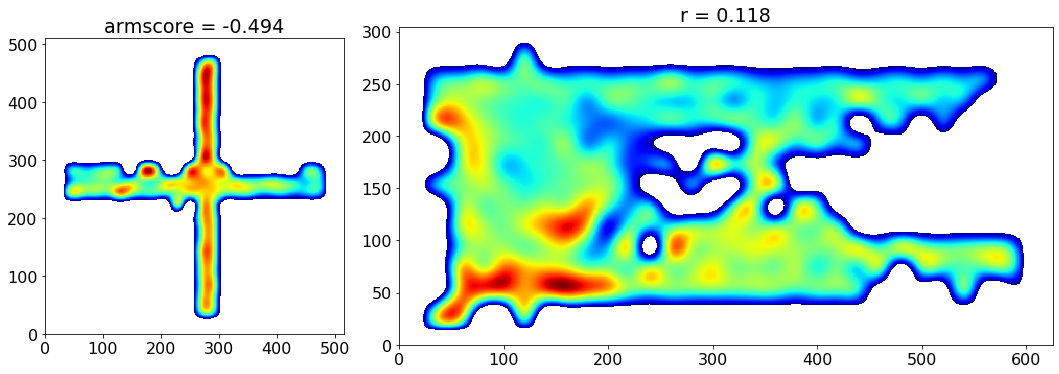

In [12]:
cell = 0
plt.figure(figsize=(15, 10))
gs = plt.GridSpec(1, 3)
ax = plt.subplot(gs[0, 0])
hm_epm_c = plotheatmap(mpos1, calc1[:, cell], ax = ax)
plt.title('armscore = ' + str(np.round(armscores[cell], 3)))
ax = plt.subplot(gs[0, 1:3])
hm_rat1_c = plotheatmap(mpos2, calc2[:, cell], ax = ax)
plt.title('r = ' + str(np.round(rs[cell], 3)))
plt.tight_layout()

Text(0, 0.5, 'cell activity')

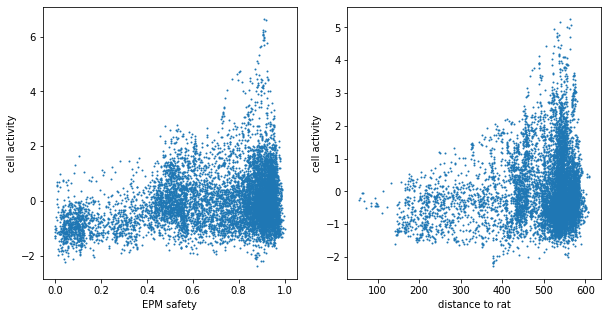

In [152]:
cell = 0
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(track1['safety'].flatten(), calc1[:, cell], s=1)
plt.xlabel('EPM safety')
plt.ylabel('cell activity')
plt.subplot(1, 2, 2)
plt.scatter(track2['distanceMouseRatMS'][:, 0], calc2[:, cell], s=1)
plt.xlabel('distance to rat')
plt.ylabel('cell activity')

In [109]:
ctypes[0]

'c'

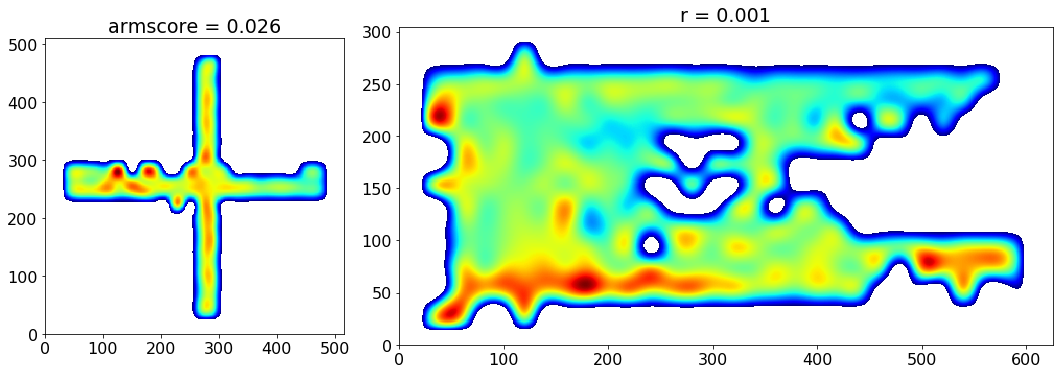

In [13]:
cell = 4
plt.figure(figsize=(15, 10))
gs = plt.GridSpec(1, 3)
ax = plt.subplot(gs[0, 0])
hm_epm_n = plotheatmap(mpos1, calc1[:, cell], ax = ax)
plt.title('armscore = ' + str(np.round(armscores[cell], 3)))
ax = plt.subplot(gs[0, 1:3])
hm_rat1_n = plotheatmap(mpos2, calc2[:, cell], ax = ax, HH=15, WW=15)
plt.title('r = ' + str(np.round(rs[cell], 3)))
plt.tight_layout()

Text(0, 0.5, 'cell activity')

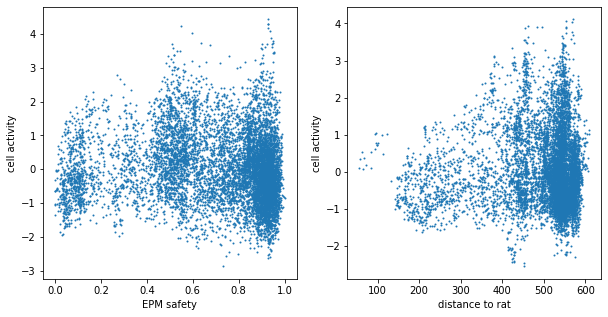

In [151]:
cell = 4
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(track1['safety'].flatten(), calc1[:, cell], s=1)
plt.xlabel('EPM safety')
plt.ylabel('cell activity')
plt.subplot(1, 2, 2)
plt.scatter(track2['distanceMouseRatMS'][:, 0], calc2[:, cell], s=1)
plt.xlabel('distance to rat')
plt.ylabel('cell activity')

In [74]:
ctypes[cell]

'n'

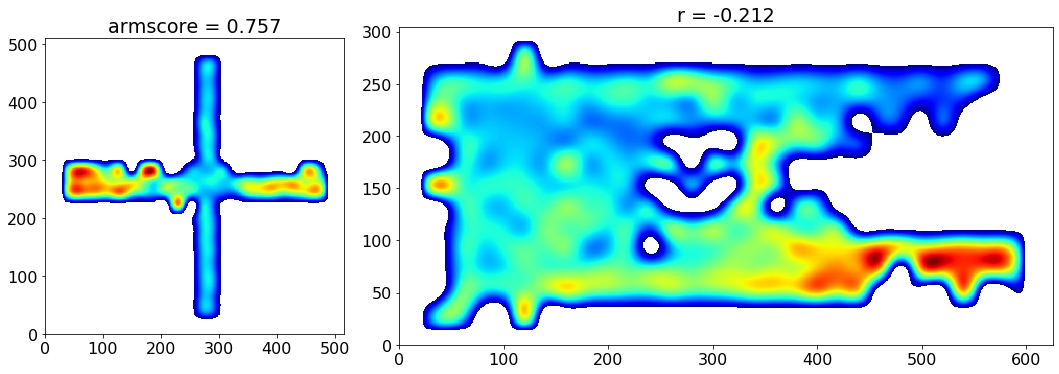

In [16]:
cell = 11
plt.figure(figsize=(15, 10))
gs = plt.GridSpec(1, 3)
ax = plt.subplot(gs[0, 0])
hm_epm_o = plotheatmap(mpos1, calc1[:, cell], ax = ax)
plt.title('armscore = ' + str(np.round(armscores[cell], 3)))
ax = plt.subplot(gs[0, 1:3])
hm_rat1_o = plotheatmap(mpos2, calc2[:, cell], ax = ax, HH=20, WW=30)
plt.title('r = ' + str(np.round(rs[cell], 3)))
plt.tight_layout()

Text(0, 0.5, 'cell activity')

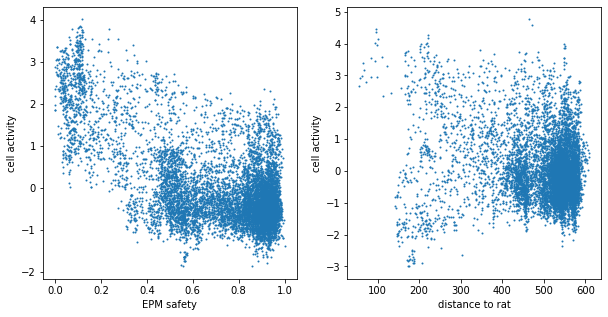

In [153]:
cell = 11
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(track1['safety'].flatten(), calc1[:, cell], s=1)
plt.xlabel('EPM safety')
plt.ylabel('cell activity')
plt.subplot(1, 2, 2)
plt.scatter(track2['distanceMouseRatMS'][:, 0], calc2[:, cell], s=1)
plt.xlabel('distance to rat')
plt.ylabel('cell activity')